In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('../data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
print(f'total price={sum(df.price)}')
print(f'max price={df.price.max()}')
print(f'min price={df.price.min()}')
print(f'mean price={df.price.mean()}')

total price=2597867440
max price=13300000
min price=1750000
mean price=4766729.247706422


### univariate analysis

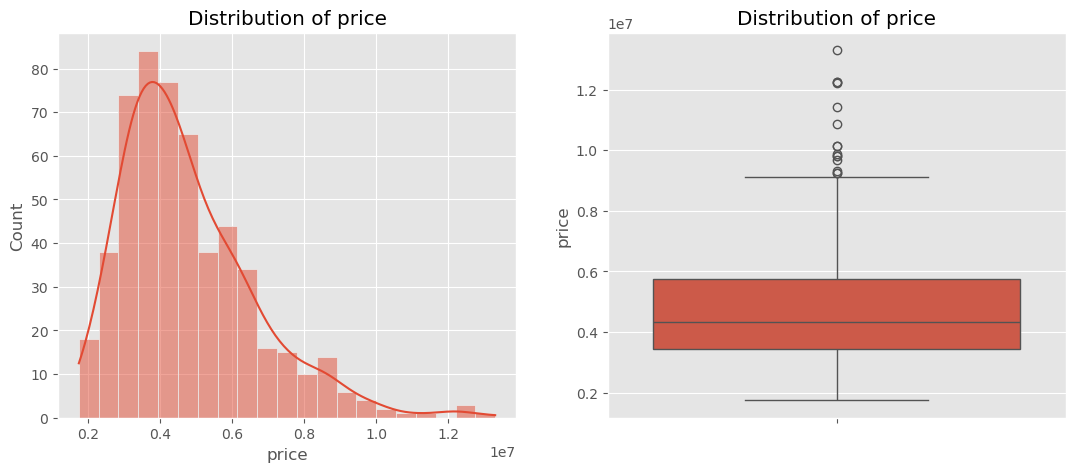

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(df.price,kde=True)
plt.title ('Distribution of price')
plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title ('Distribution of price')


plt.show()


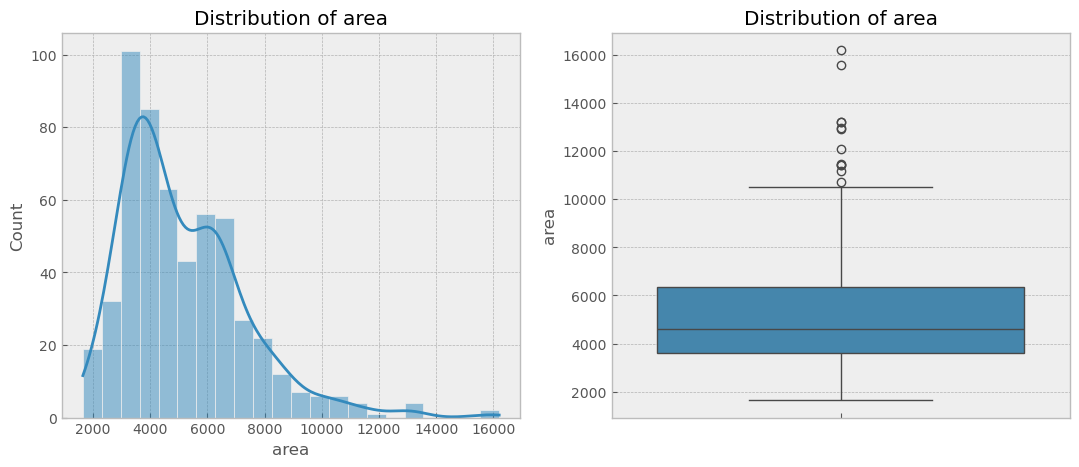

In [8]:
plt.style.use('bmh')
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(df.area,kde=True)
plt.title ('Distribution of area')
plt.subplot(1,2,2)
sns.boxplot(df.area,orient='ha')
plt.title ('Distribution of area')


plt.show()

### cal outliers in area and price

In [9]:
c=['price','area']
for i in c:
    max_=df[i].max()
    min_=df[i].min()
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    if max_>upper_bound:
        print(f'outliers in column {i}={max_-upper_bound}')
    
    elif min_<lower_bound:
        print(f'outliers in column {i}={lower_bound-min_}')
    else:
        print(f'no outliers in column {i} lower bound')

    

outliers in column price=4095000.0
outliers in column area=5700.0


           count
bathrooms       
1            401
2            133
3             10
4              1


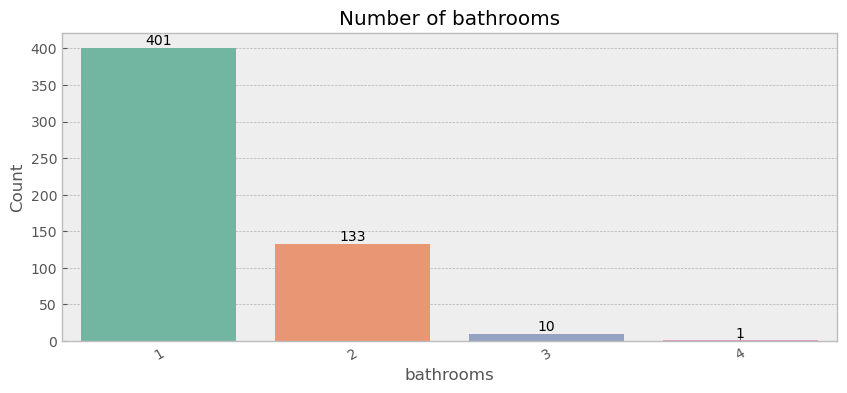

         count
stories       
2          238
1          227
4           41
3           39


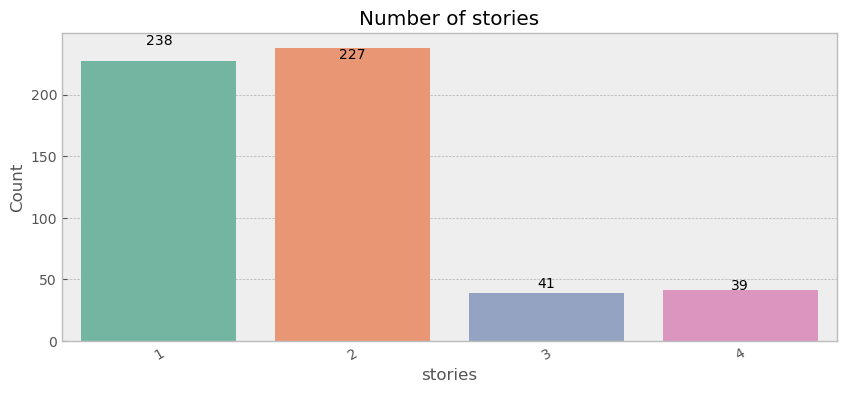

          count
mainroad       
yes         468
no           77


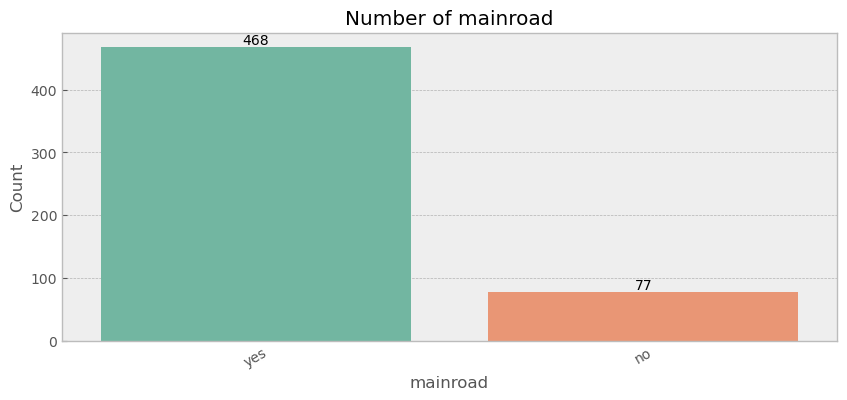

           count
guestroom       
no           448
yes           97


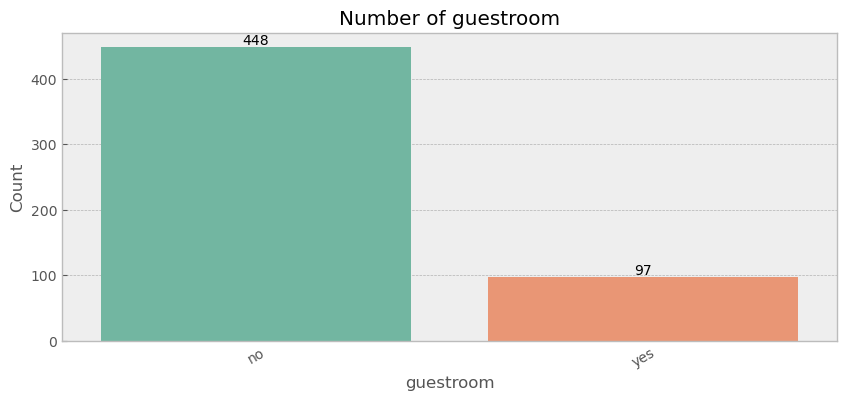

          count
basement       
no          354
yes         191


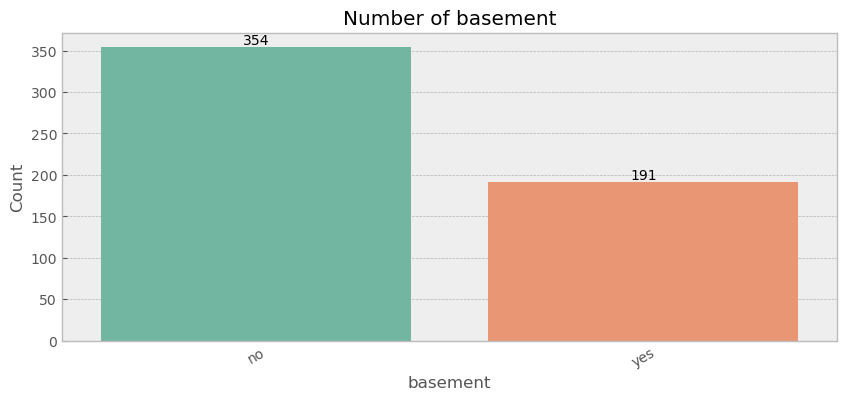

                 count
hotwaterheating       
no                 520
yes                 25


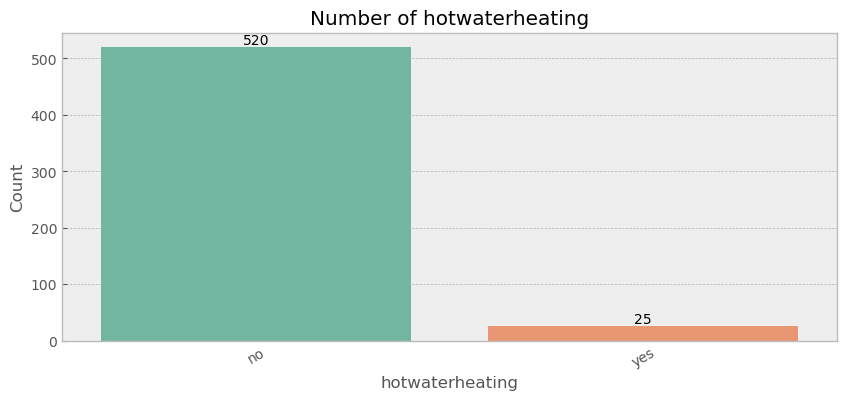

                 count
airconditioning       
no                 373
yes                172


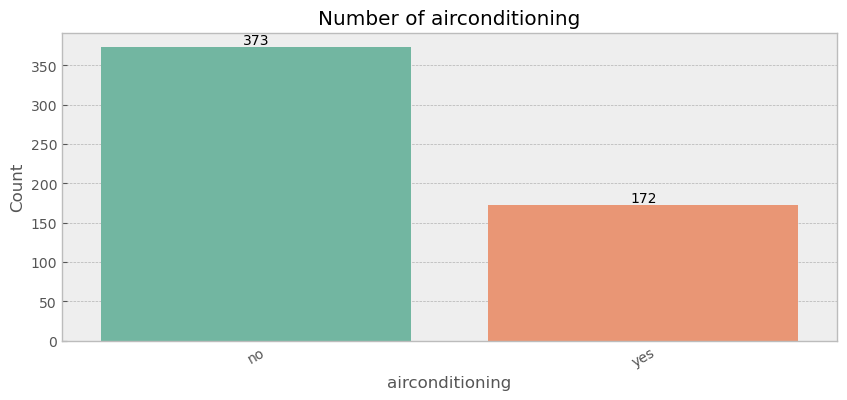

         count
parking       
0          299
1          126
2          108
3           12


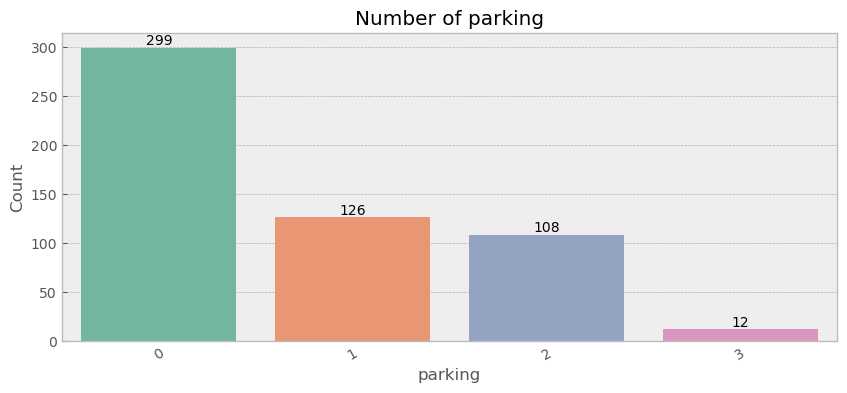

          count
prefarea       
no          417
yes         128


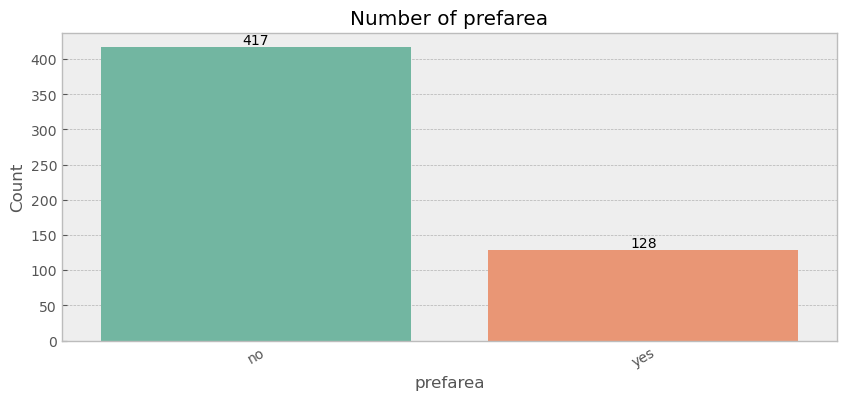

                  count
furnishingstatus       
semi-furnished      227
unfurnished         178
furnished           140


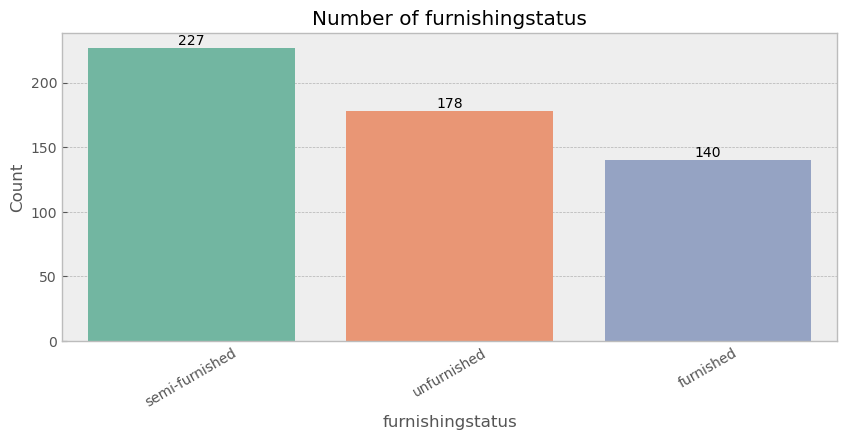

          count
bedrooms       
3           300
2           136
4            95
5            10
6             2
1             2


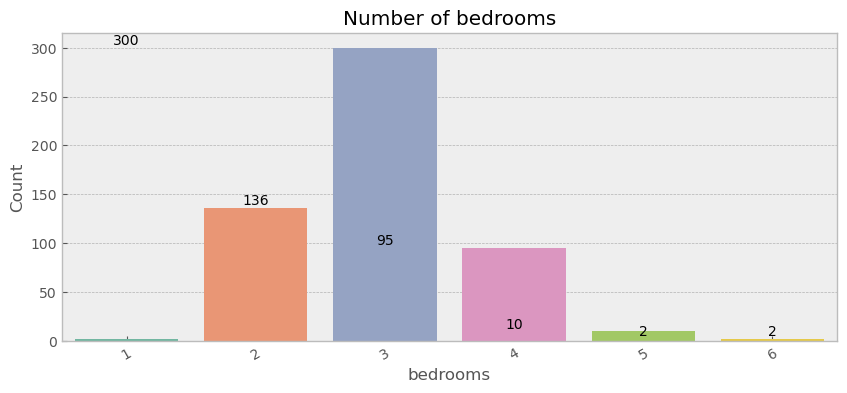

In [10]:
c=['bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','bedrooms']
for i in c:
    print(pd.DataFrame(df[i].value_counts()))

    plt.figure(figsize=(10,4))
    sns.barplot(x=df[i].value_counts().index,y=df[i].value_counts().values,palette="Set2")
    for index,value in enumerate(df[i].value_counts().values):
        plt.text(index,value,f'{round(value,2)}',va='bottom',ha='center')
    plt.title(f"Number of {i}")
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()
            

#### bivariate anaylsis study each column with [price]

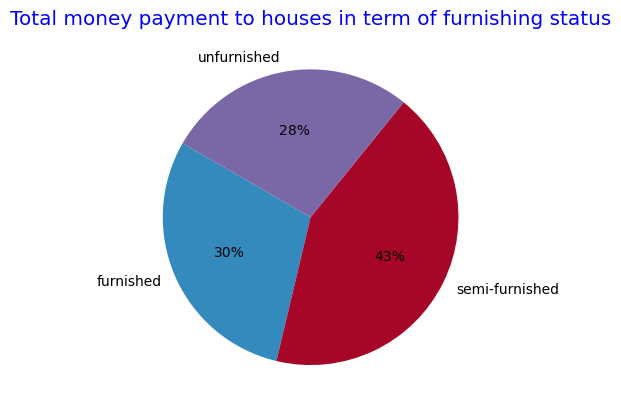

,price
furnishingstatus,
furnished,769397440
semi-furnished,1114008000
unfurnished,714462000


In [12]:
g=df.groupby('furnishingstatus')['price'].sum()
plt.pie(g.values,labels=g.index,autopct='%0.0f%%',startangle=150)
plt.title('Total money payment to houses in term of furnishing status',c='b')
plt.show()
pd.DataFrame(g)

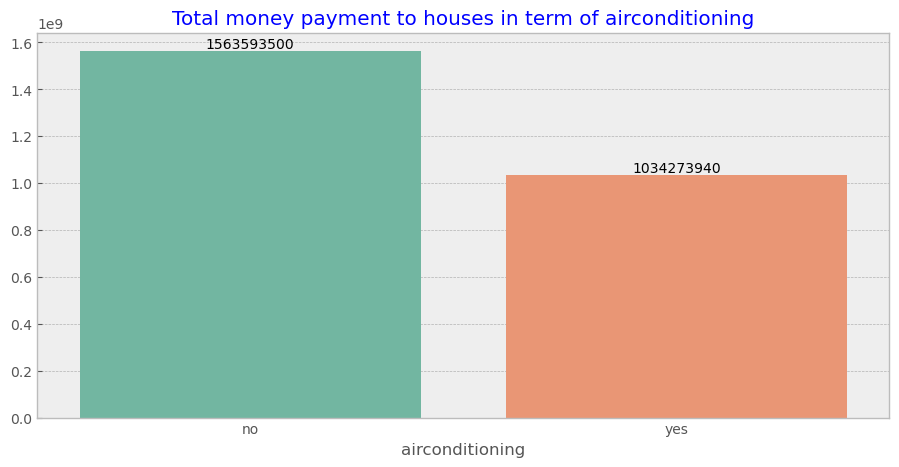

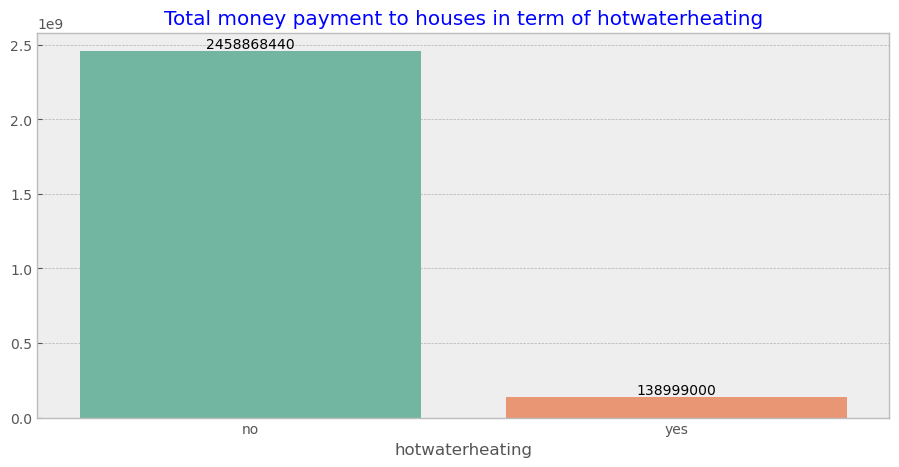

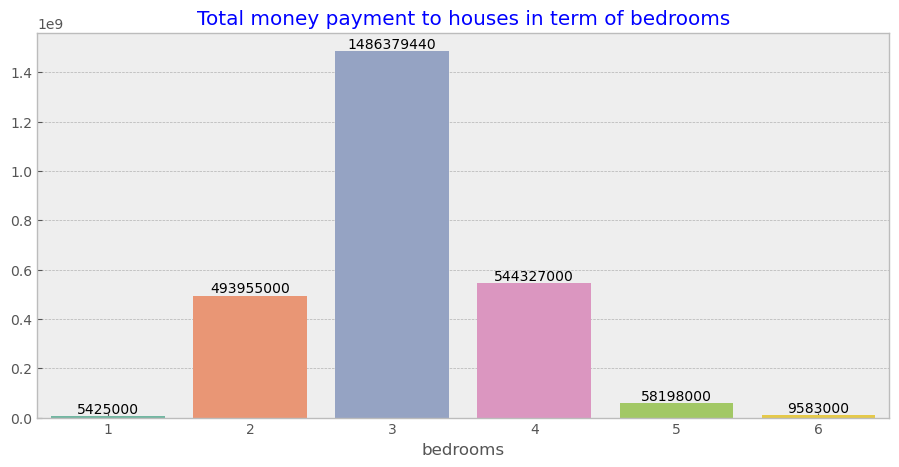

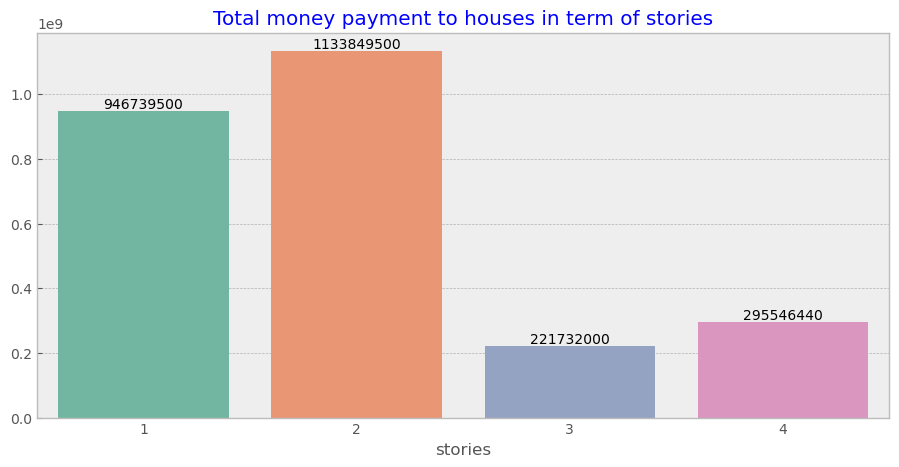

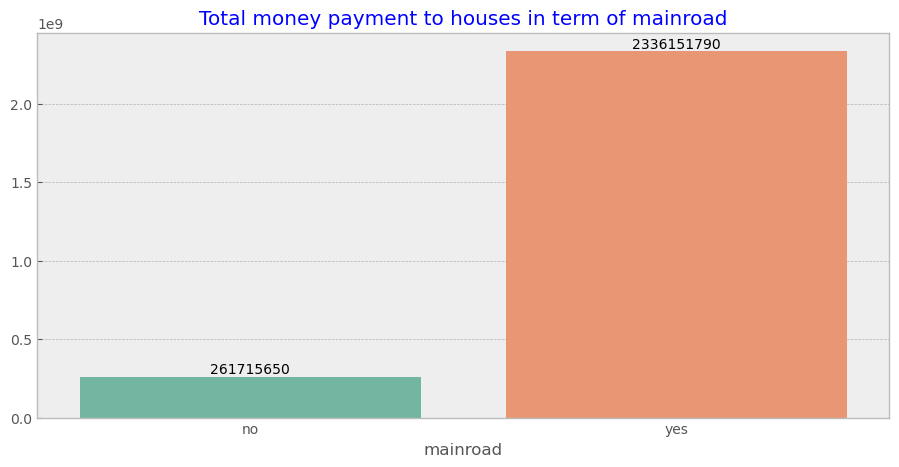

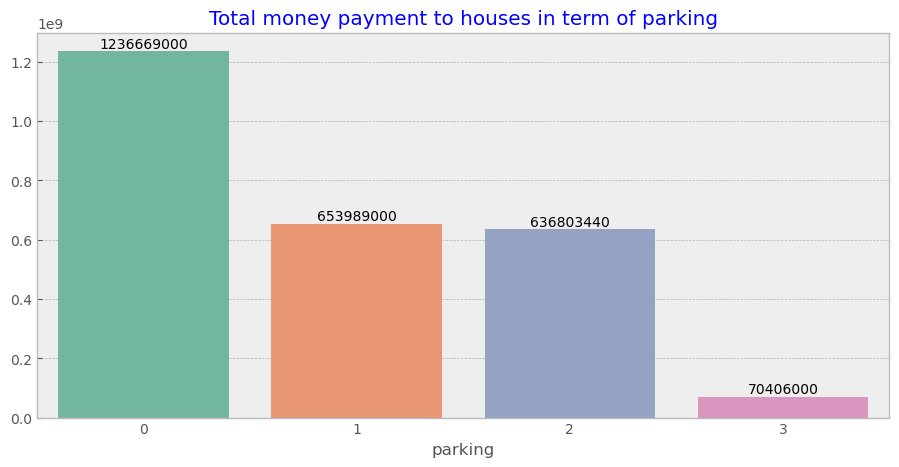

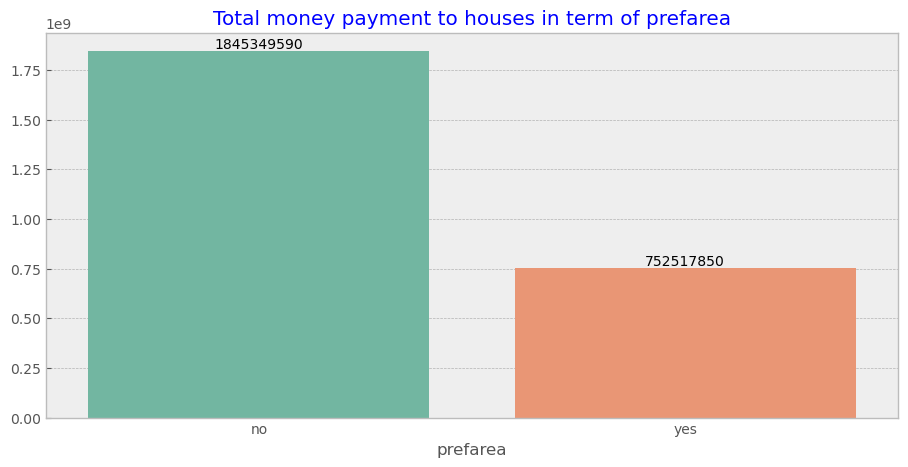

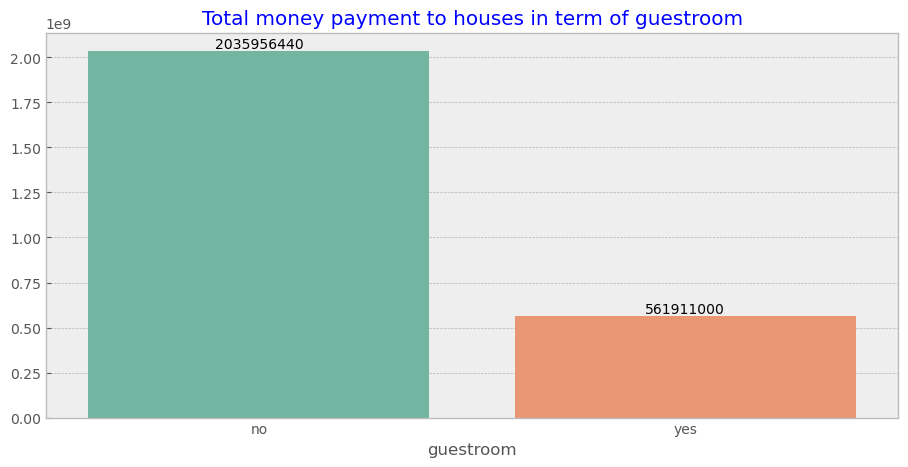

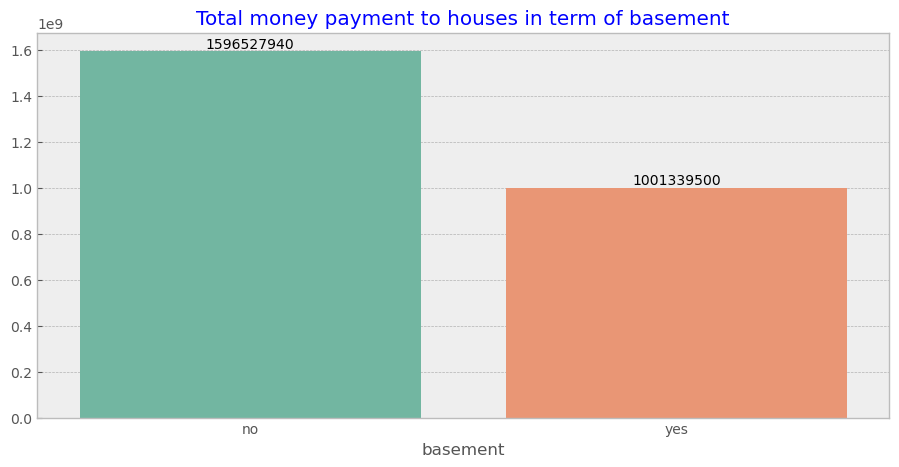

In [43]:
c=['airconditioning','hotwaterheating','bedrooms','stories','mainroad','parking','prefarea','guestroom','basement']
for i in c:
    g=df.groupby(i)['price'].sum()
    plt.figure(figsize=(11,5))
    sns.barplot(x=g.index,y=g.values,palette='Set2')
    plt.title(f'Total money payment to houses in term of {i}',c='b')
    for i,j in enumerate(g.values):
        plt.text(i,j,str(j),va='bottom',ha='center')
    plt.show()

### study max value of money for each column

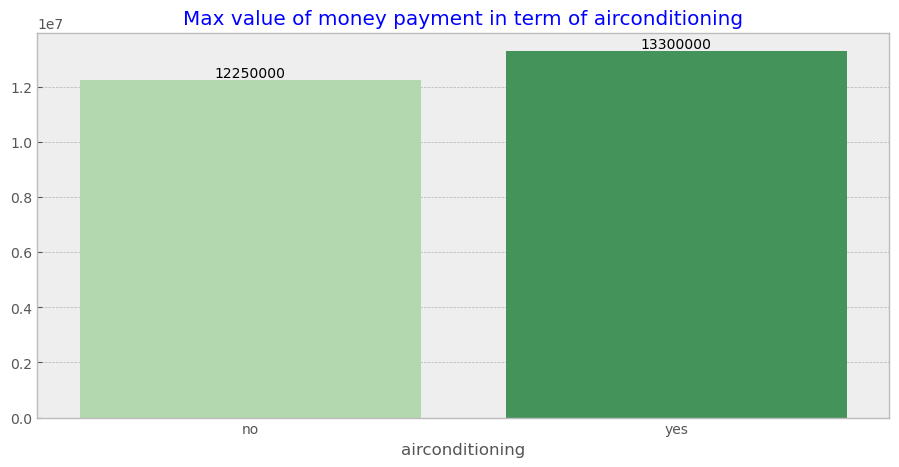

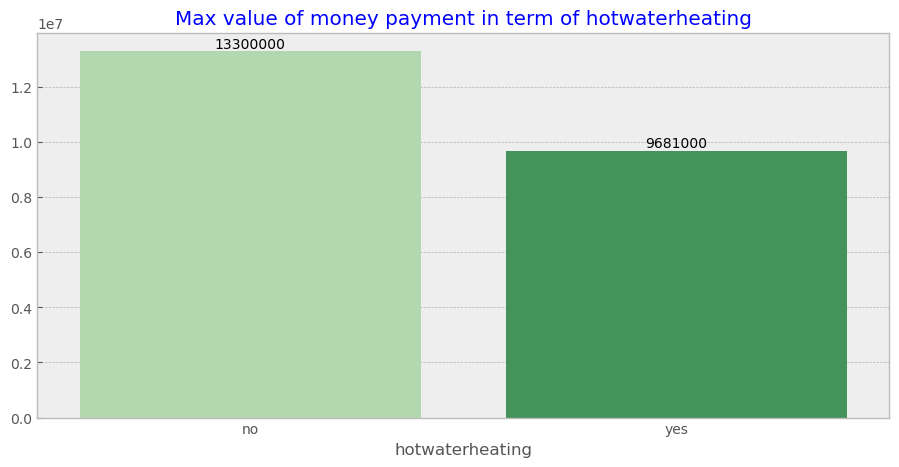

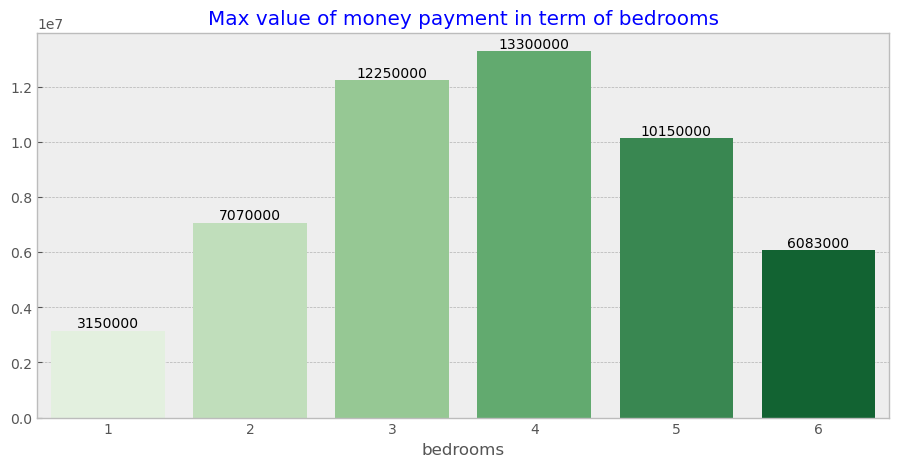

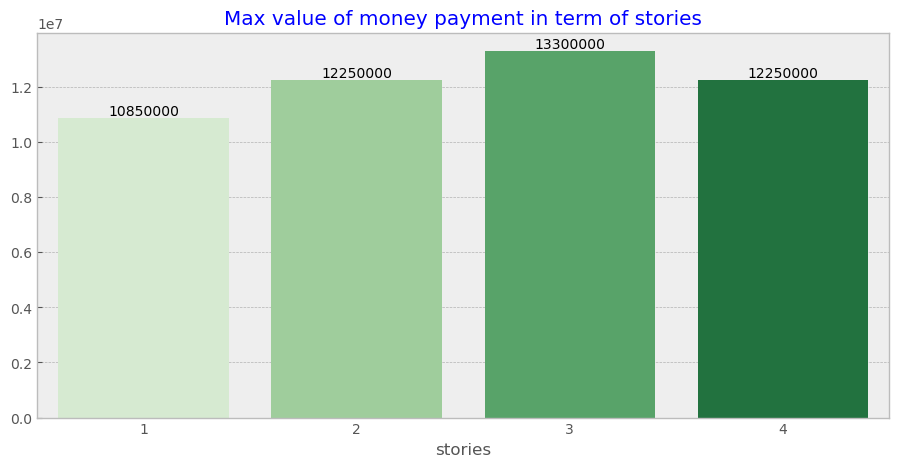

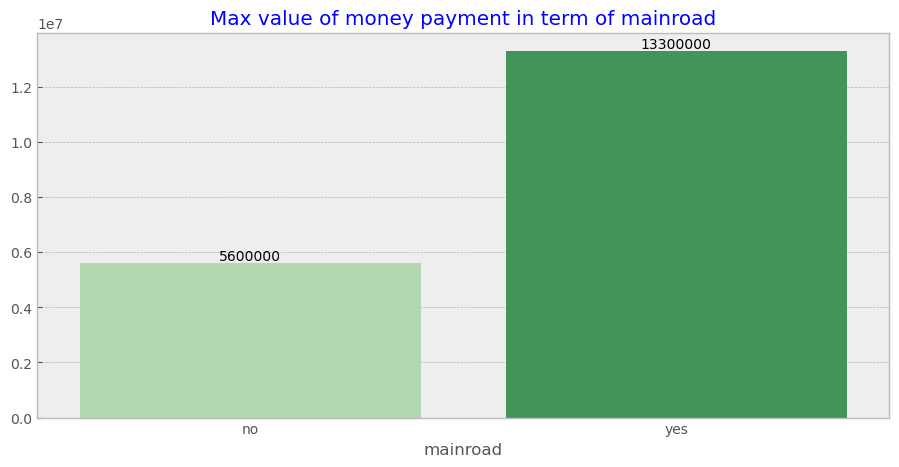

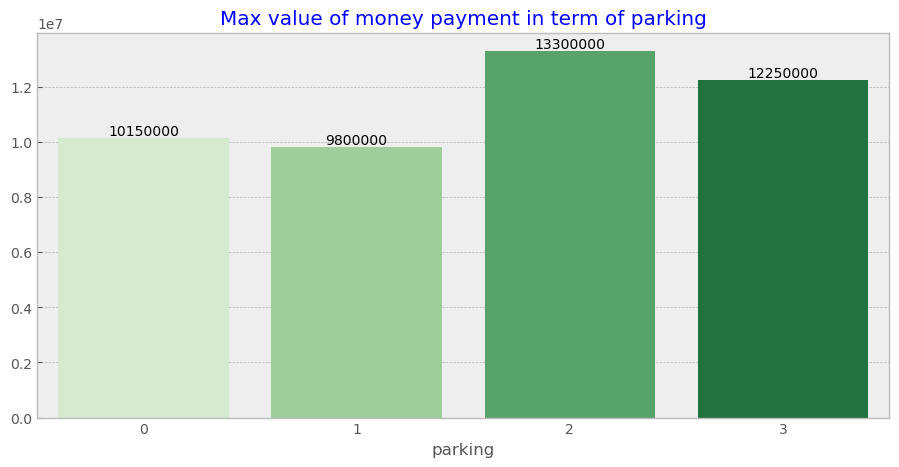

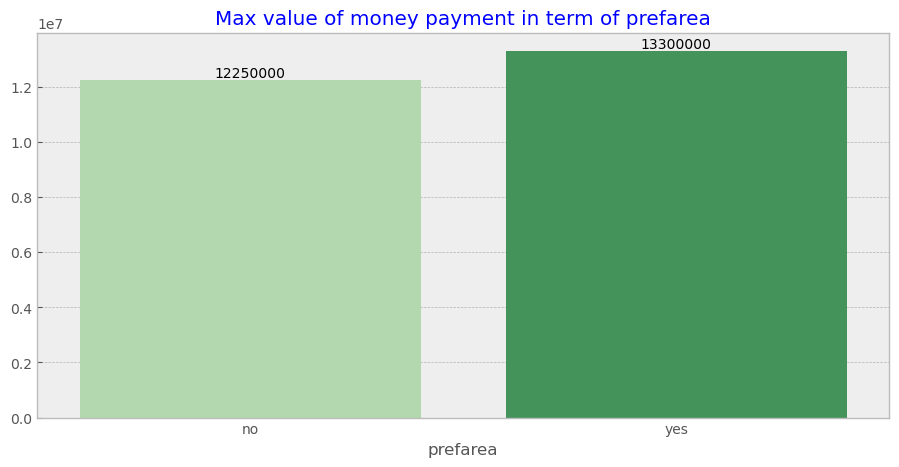

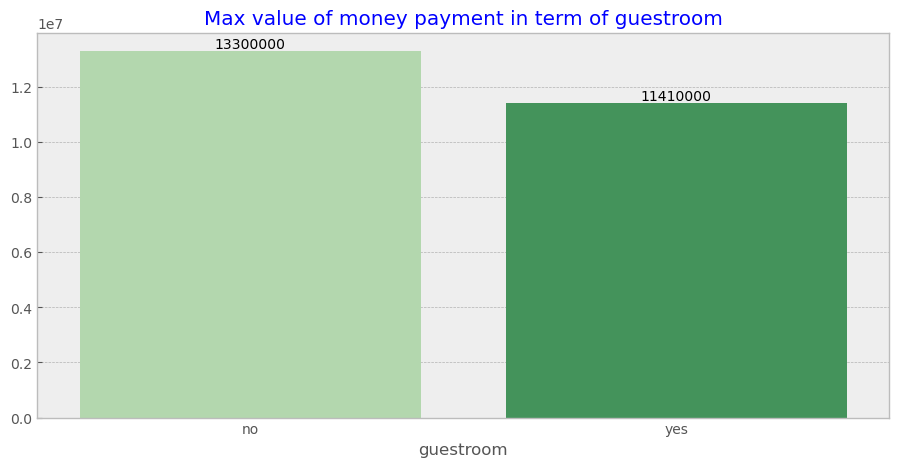

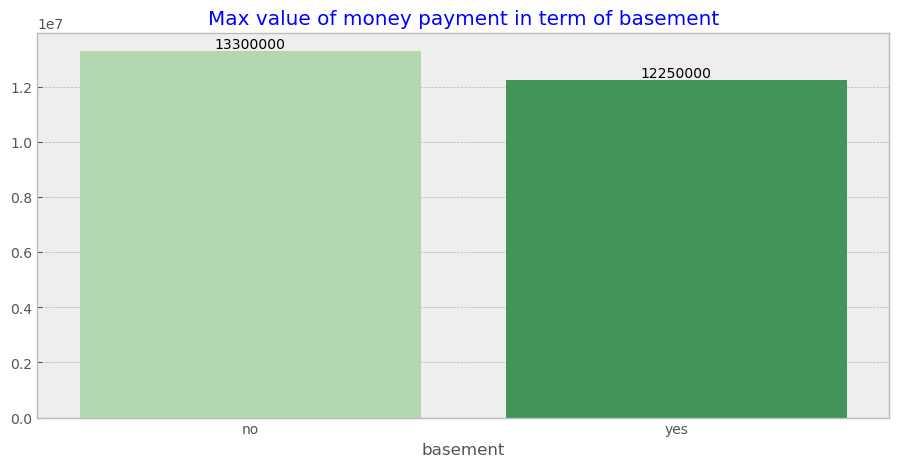

In [14]:
c=['airconditioning','hotwaterheating','bedrooms','stories','mainroad','parking','prefarea','guestroom','basement']
for i in c:
    g=df.groupby(i)['price'].max()
    plt.figure(figsize=(11,5))
    sns.barplot(x=g.index,y=g.values,palette='Greens')
    plt.title(f'Max value of money payment in term of {i}',c='b')
    for i,j in enumerate(g.values):
        plt.text(i,j,str(j),va='bottom',ha='center')
    plt.show()

### study min value of money for each column

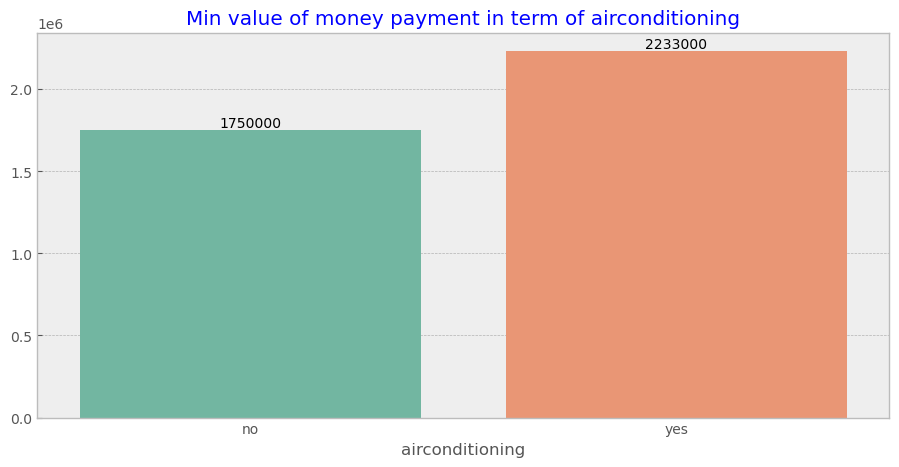

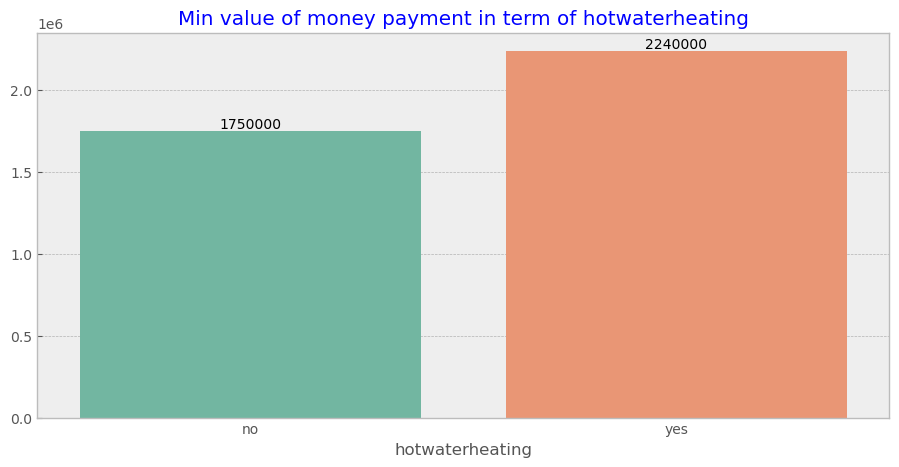

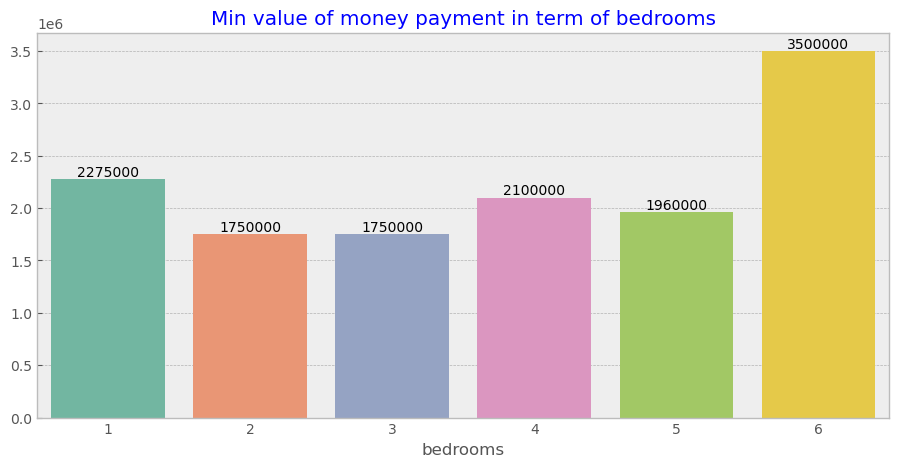

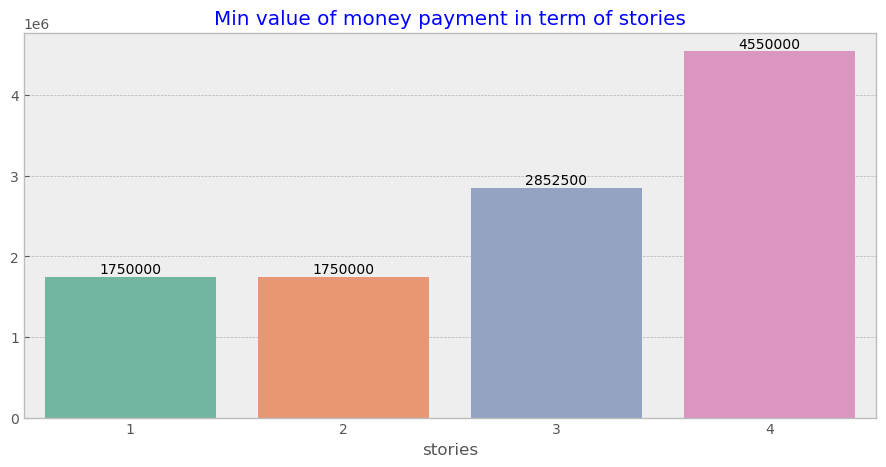

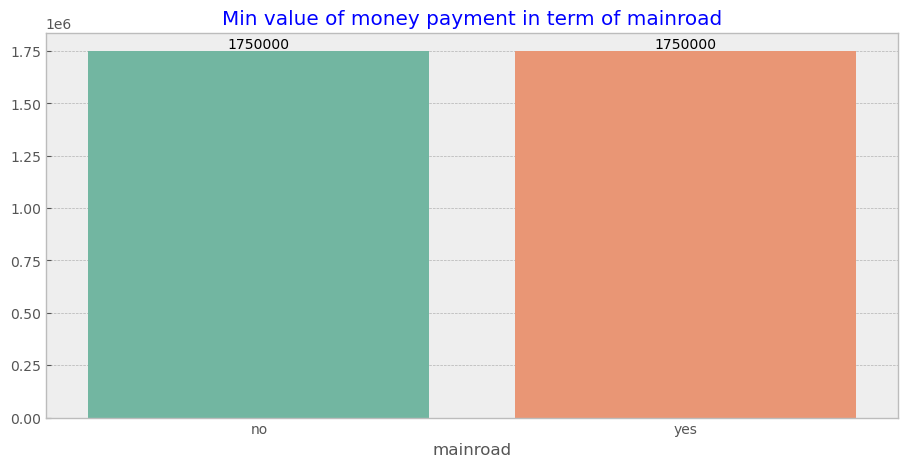

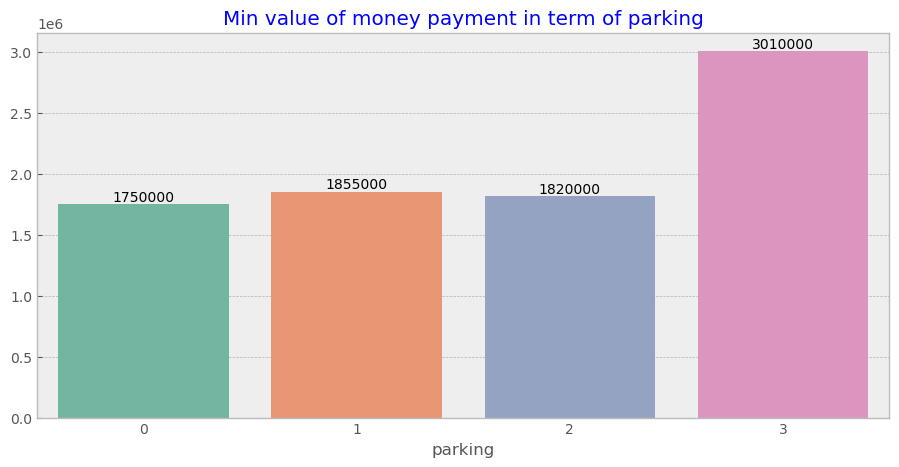

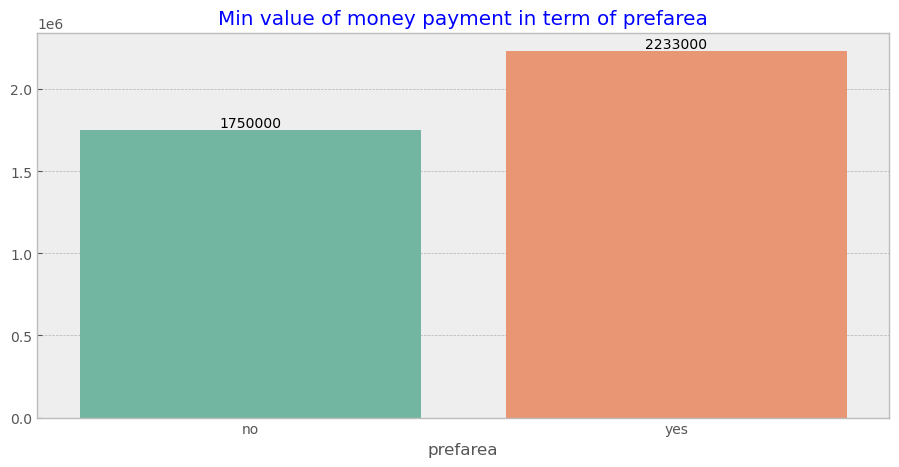

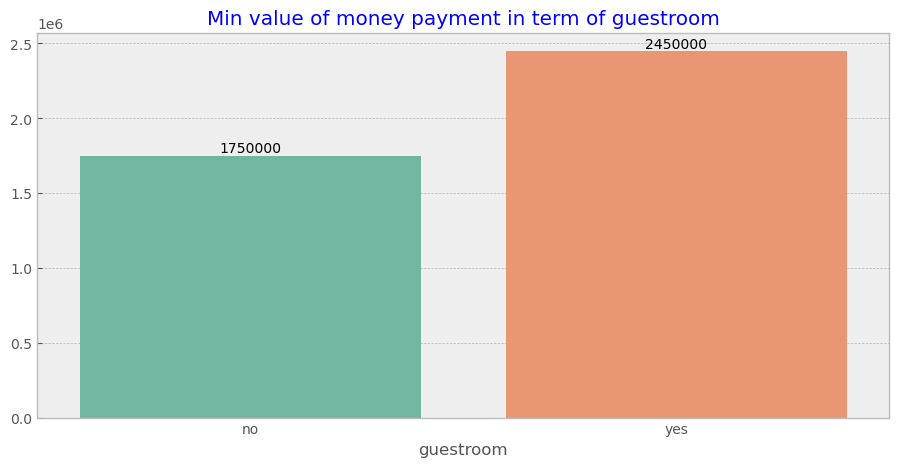

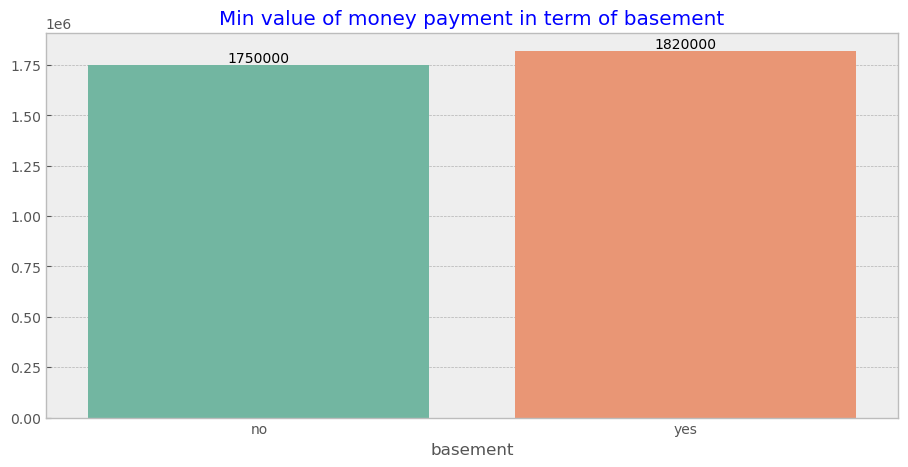

In [15]:
c=['airconditioning','hotwaterheating','bedrooms','stories','mainroad','parking','prefarea','guestroom','basement']
for i in c:
    g=df.groupby(i)['price'].min()
    plt.figure(figsize=(11,5))
    sns.barplot(x=g.index,y=g.values,palette='Set2')
    plt.title(f'Min value of money payment in term of {i}',c='b')
    for i,j in enumerate(g.values):
        plt.text(i,j,str(j),va='bottom',ha='center')
    plt.show()

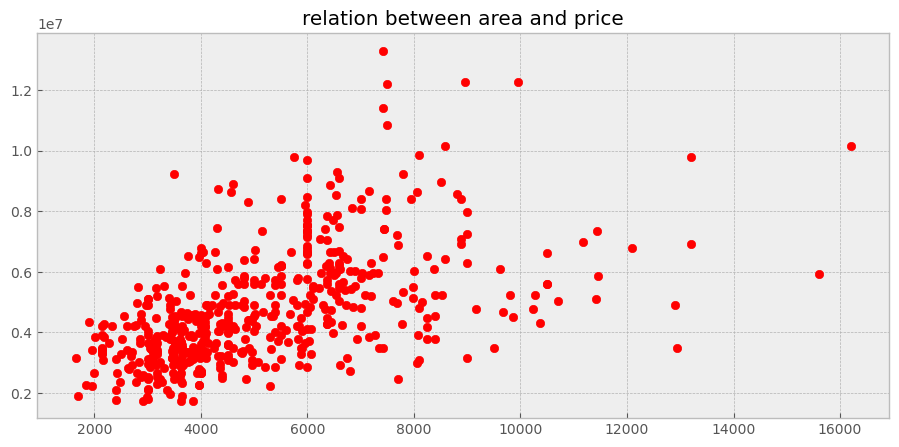

In [16]:
plt.figure(figsize=(11,5))
plt.scatter(x='area',y='price',data=df,c='r')
plt.title('relation between area and price')
plt.show()

furnishingstatus,furnished,semi-furnished,unfurnished
parking,,,
0,269426500,535696000,431546500
1,234605000,268037000,151347000
2,225290940,287994000,123518500
3,40075000,22281000,8050000


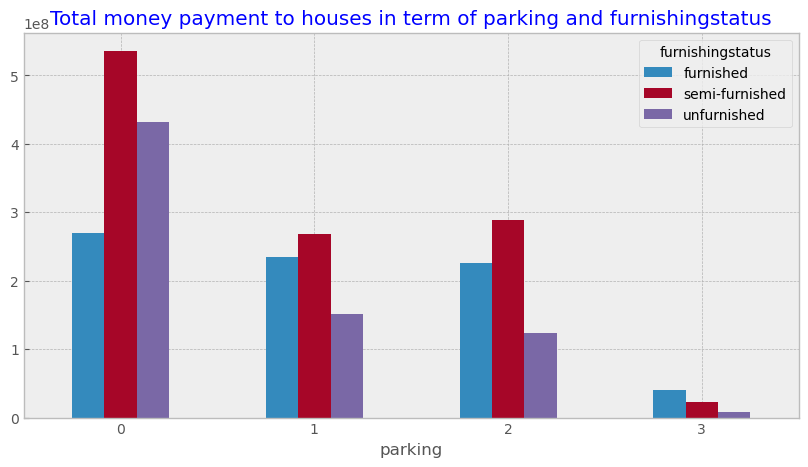

In [17]:
cr=pd.crosstab(df['parking'],df['furnishingstatus'],aggfunc='sum',values=df.price)
cr.plot(kind='bar',figsize=(10,5))
plt.title('Total money payment to houses in term of parking and furnishingstatus',c='b')

plt.xticks(rotation=0)
cr

### Total money payment to houses in term of airconditioning,hotwaterheating and furnishingstatus

In [18]:
pd.crosstab([df['airconditioning'],df['hotwaterheating']],df['furnishingstatus'],aggfunc='sum',values=df.price)


furnishingstatus                   furnished  semi-furnished  unfurnished
airconditioning hotwaterheating                                          
no              no               309498000.0     666610000.0  452126500.0
                yes               39123000.0      71778000.0   24458000.0
yes             no               420776440.0     371980000.0  237877500.0
                yes                      NaN       3640000.0          NaN

#### 

 ### total money in terms of guestroom,basement,prefarea

In [19]:
pd.DataFrame(df.groupby(['guestroom','basement','prefarea'])['price'].sum())

price
guestroom basement prefarea            
no        no       no        1141443590
                   yes        299323850
          yes      no         368119500
                   yes        227069500
yes       no       no         129405500
                   yes         26355000
          yes      no         206381000
                   yes        199769500

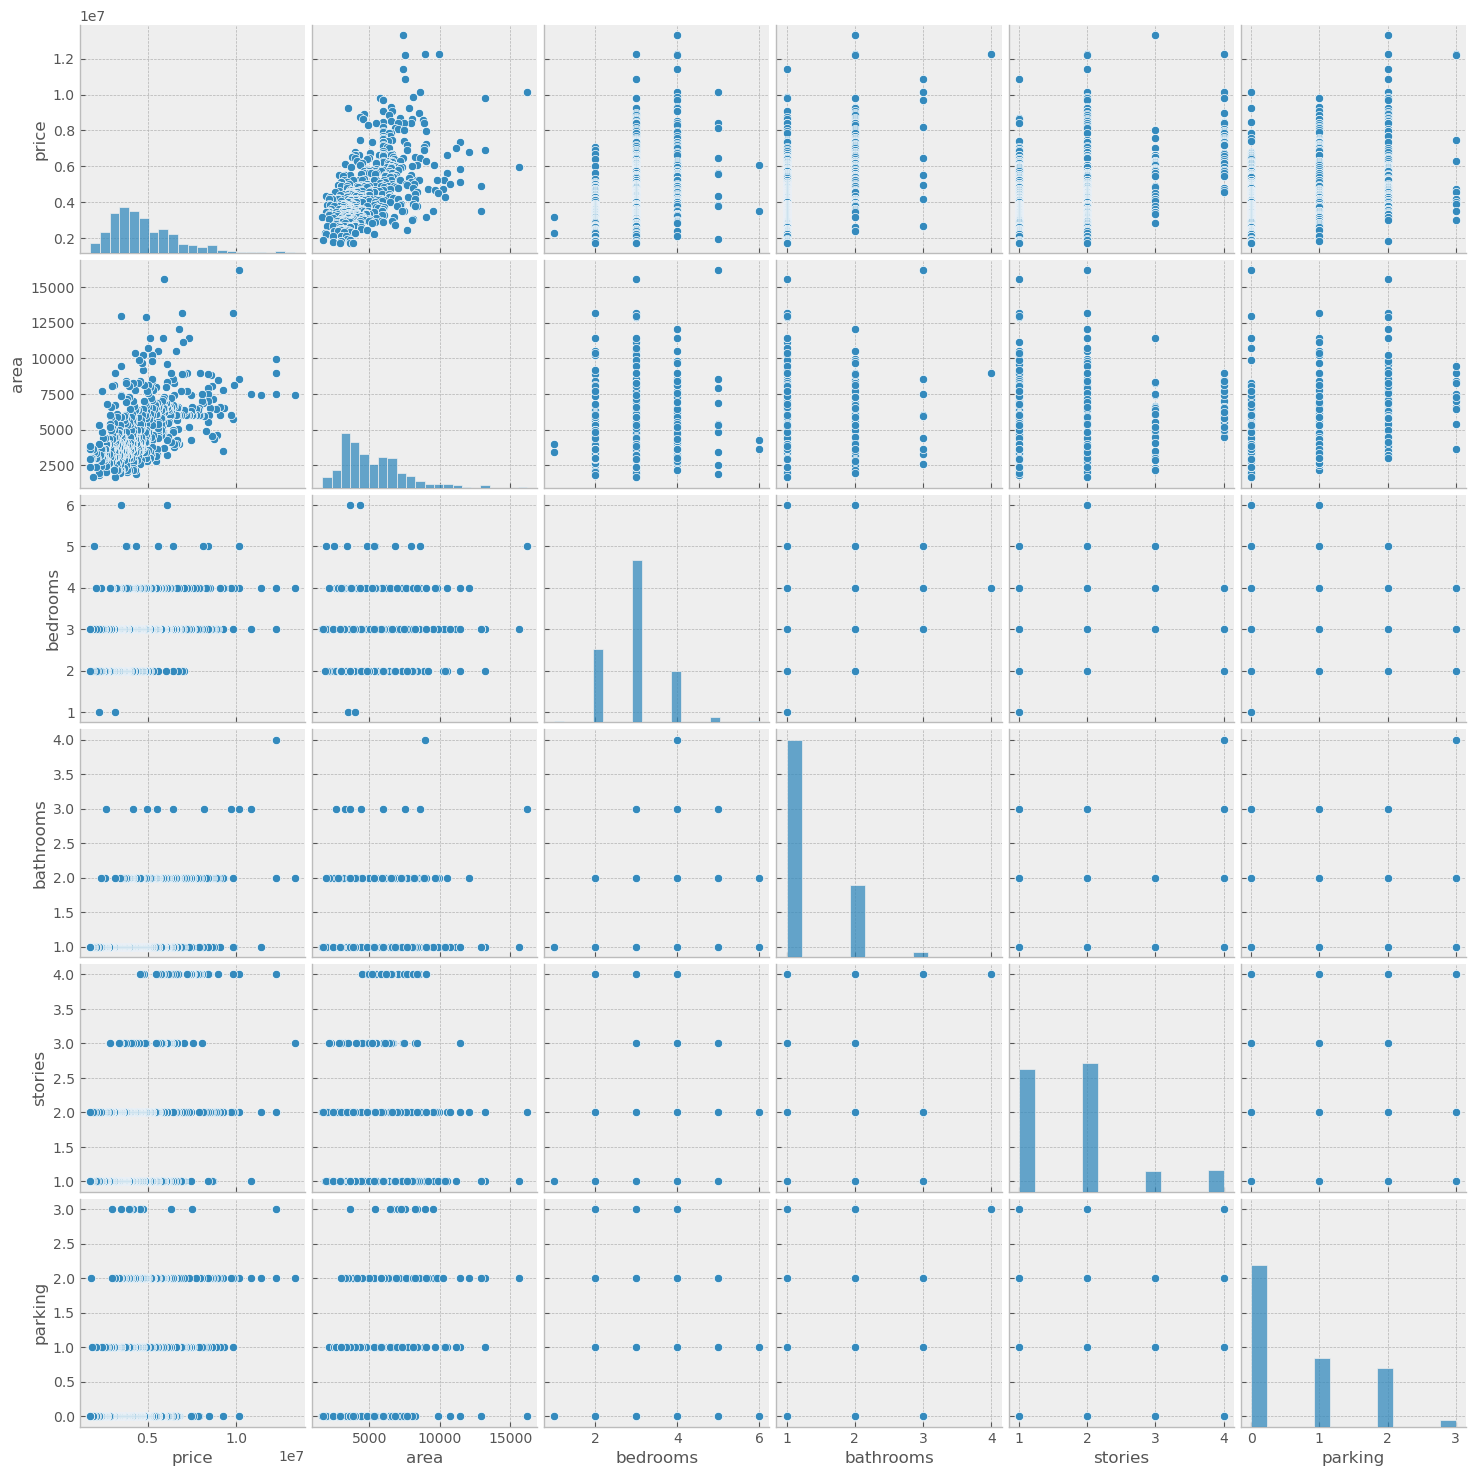

In [20]:
sns.pairplot(df)
plt.show()

### ML modesl

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score,accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [22]:
data=df.copy()

### encoder to data

In [23]:
data['mainroad']=data['mainroad'].replace({'yes':1,"no":0})
data['guestroom']=data['guestroom'].replace({'yes':1,"no":0})
data['basement']=data['basement'].replace({'yes':1,"no":0})
data['hotwaterheating']=data['hotwaterheating'].replace({'yes':1,"no":0})
data['airconditioning']=data['airconditioning'].replace({'yes':1,"no":0})
data['prefarea']=data['prefarea'].replace({'yes':1,"no":0})
data['furnishingstatus']=data['furnishingstatus'].replace({'furnished':2,'semi-furnished':1,"unfurnished":0})


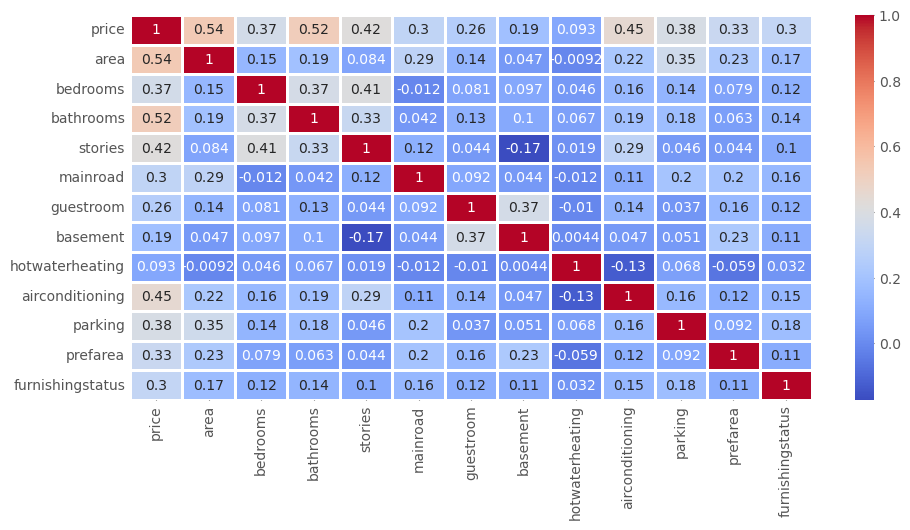

In [24]:
corr=data.corr()
plt.figure(figsize=(11,5))
sns.heatmap(corr,annot=True, linewidths=.8, cmap="coolwarm")
 
plt.show()


### delete outliers

In [25]:
z_scores = (df['price'] - df['price'].mean()) / df['price'].std()
data = data[np.abs(z_scores) < 3]  

In [26]:
x=data.drop('price',axis=1)
y=data['price']

### normaliztion to data

In [27]:
scale=StandardScaler()
X=scale.fit_transform(x)

### split data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41)

In [29]:
lasso=Lasso()
ridge=Ridge()
svr=SVR()
lr=LinearRegression()
rf=RandomForestRegressor()
tree=DecisionTreeRegressor()
ada=AdaBoostRegressor()
xg=XGBRegressor()
grd=GradientBoostingRegressor()

In [30]:
models=[lasso,ridge,svr,lr,rf,grd,tree,ada,xg]

### function to fit model and cal r2_score

In [31]:
def pred (m):
    m.fit(x_train,y_train)
    pred_y=m.predict(x_test)
    print({r2_score(y_test,pred_y)})

### cal r2_score to algorithms

In [32]:
print(f' r2 score in lasso={pred(lasso)}')
print(f' r2 score in ridge={pred(ridge)}')
print(f' r2 score in svm={pred(svr)}')
print(f' r2 score in linearRegression={pred(lr)}')
print(f' r2 score in lRandomForest={pred(rf)}')
print(f' r2 score in tree={pred(tree)}')
print(f' r2 score in adaboost={pred(ada)}')
print(f'r2 score in XGboost={pred(xg)}')
print(f' r2 score in Gredientboost={pred(grd)}')

{0.6328302318799108}
 r2 score in lasso=None
{0.632988098012742}
 r2 score in ridge=None
{-0.02500003365039194}
 r2 score in svm=None
{0.6328302436673878}
 r2 score in linearRegression=None
{0.6456378722025904}
 r2 score in lRandomForest=None
{0.31801353943619726}
 r2 score in tree=None
{0.5712128160041388}
 r2 score in adaboost=None
{0.5726728295779048}
r2 score in XGboost=None
{0.6524002949711583}
 r2 score in Gredientboost=None


### cal cross valdation to select best algorithm

In [33]:
for i in models:
    score=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    print(f'{i}={np.mean(score)}')

Lasso()=0.6508475113205974
Ridge()=0.6510158633663974
SVR()=-0.06214305716322799
LinearRegression()=0.6508475088848098
RandomForestRegressor()=0.5817325139234756
GradientBoostingRegressor()=0.6014570087572013
DecisionTreeRegressor()=0.24665119251022372
AdaBoostRegressor()=0.5305079780821311
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_paral

### linear Regression

In [34]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [35]:
pred_linear=linear.predict(x_test)

In [36]:
print(f'accuracy in trainning: {linear.score(x_train,y_train)}')
print(f'accuracy in testing: {linear.score(x_test,y_test)}')
print(f'r2_score: {r2_score(y_test,pred_linear)}')

accuracy in trainning: 0.6868455715869352
accuracy in testing: 0.6328302436673878
r2_score: 0.6328302436673878


### GradientBoostingRegressor

In [37]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [38]:
pred_gbr=gbr.predict(x_test)

In [39]:
print(f'accuracy in trainning: {gbr.score(x_train,y_train)}')
print(f'accuracy in testing: {gbr.score(x_test,y_test)}')
print(f'r2 score= {r2_score(y_test,pred_gbr)}')


accuracy in trainning: 0.856980697115542
accuracy in testing: 0.6503717341511699
r2 score= 0.6503717341511699


### Random forest classifier

In [40]:

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

randomf_pred = model.predict(x_test)
print(f'accuracy in trainning: {model.score(x_train,y_train)}')
print(f'accuracy in testing: {model.score(x_test,y_test)}')
print("R2:", r2_score(y_test, randomf_pred))

accuracy in trainning: 0.94583482844678
accuracy in testing: 0.6607317375293615
R2: 0.6607317375293615


In [41]:
def plot_dist(y , y_hat):
    plt.figure()
    
    sns.kdeplot(y, color='blue', fill=True, label='Actual Values')
    sns.kdeplot(y_hat, color='red', fill=True, label='Predicted Values')
    plt.legend()
    plt.title('Actual vs Fitted values')
    plt.show()

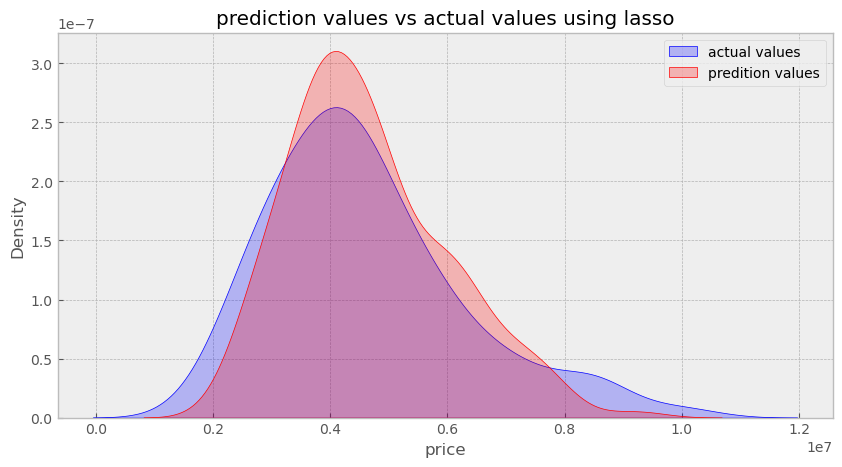

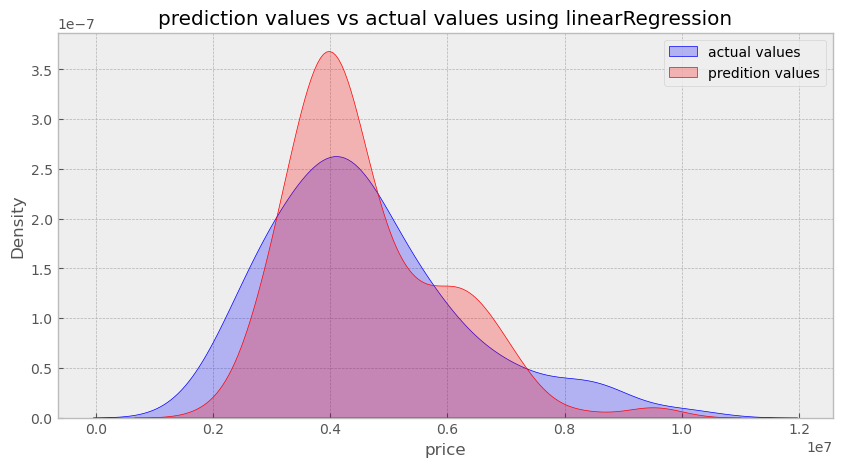

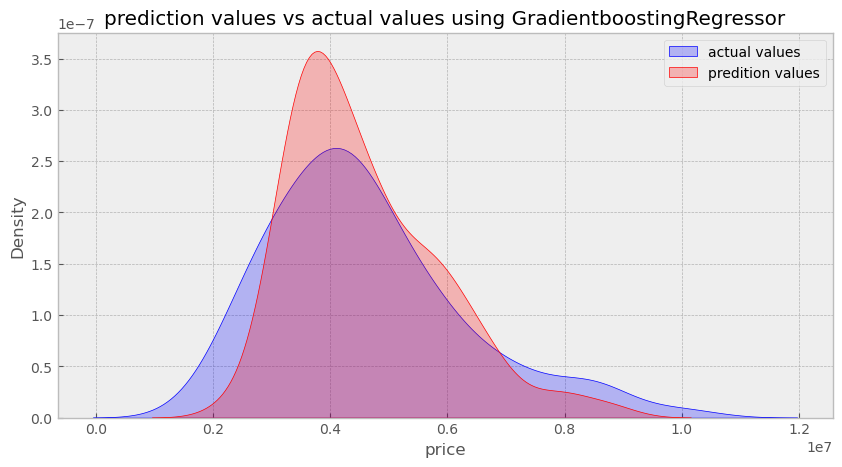

In [42]:
prediction_in_models=[pred_linear,pred_gbr,randomf_pred]
names=['lasso','linearRegression','GradientboostingRegressor','RandomForestRegressor']
for i,j in zip  (prediction_in_models,names):
    plt.figure(figsize=(10,5))
    sns.kdeplot(y_test,color='b',fill=True,label='actual values')
    sns.kdeplot(i,color='r',fill=True,label='predition values')
    plt.title(f'prediction values vs actual values using {j}')
    plt.legend()
    plt.show()
